Below is the code used to generate our EDA plots

Dataset shape: (590, 60)
                 case_id                               diagnostic_reasoning  \
count                590                                                590   
unique               587                                                586   
top     MCASE074-K23.831  [{'condition': 'COND264', 'condition_name': 'C...   
freq                   2                                                  2   
mean                 NaN                                                NaN   
std                  NaN                                                NaN   
min                  NaN                                                NaN   
25%                  NaN                                                NaN   
50%                  NaN                                                NaN   
75%                  NaN                                                NaN   
max                  NaN                                                NaN   

       patient_profile.age

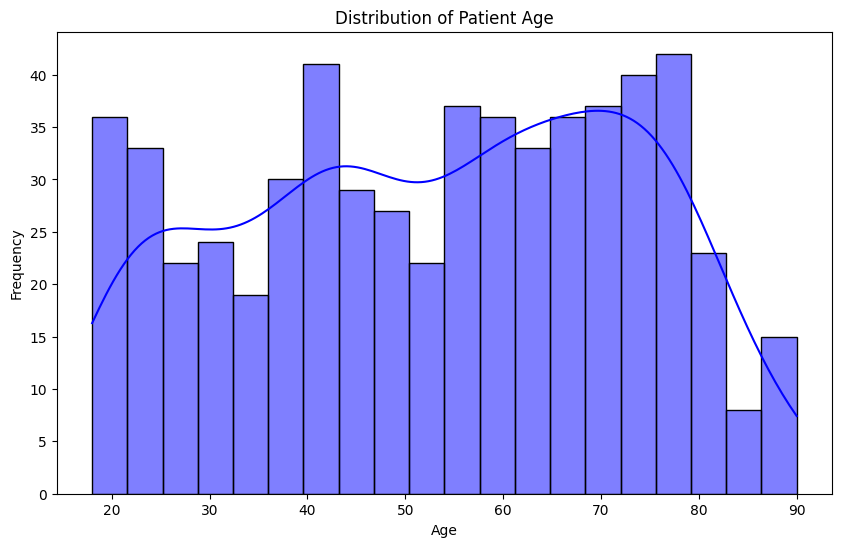

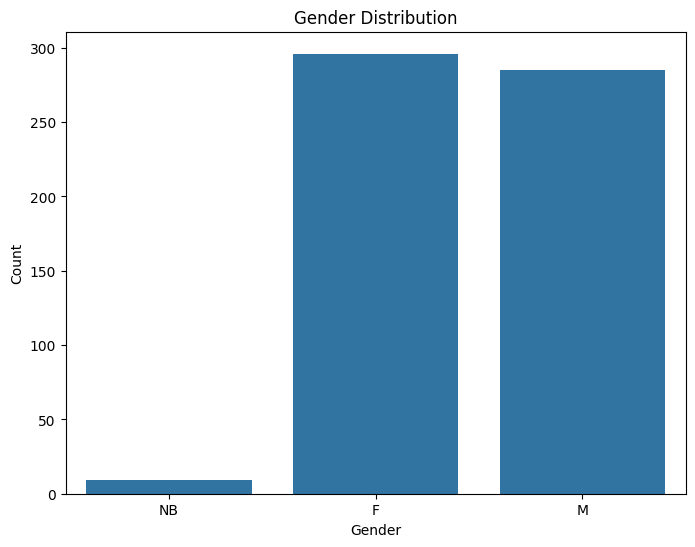

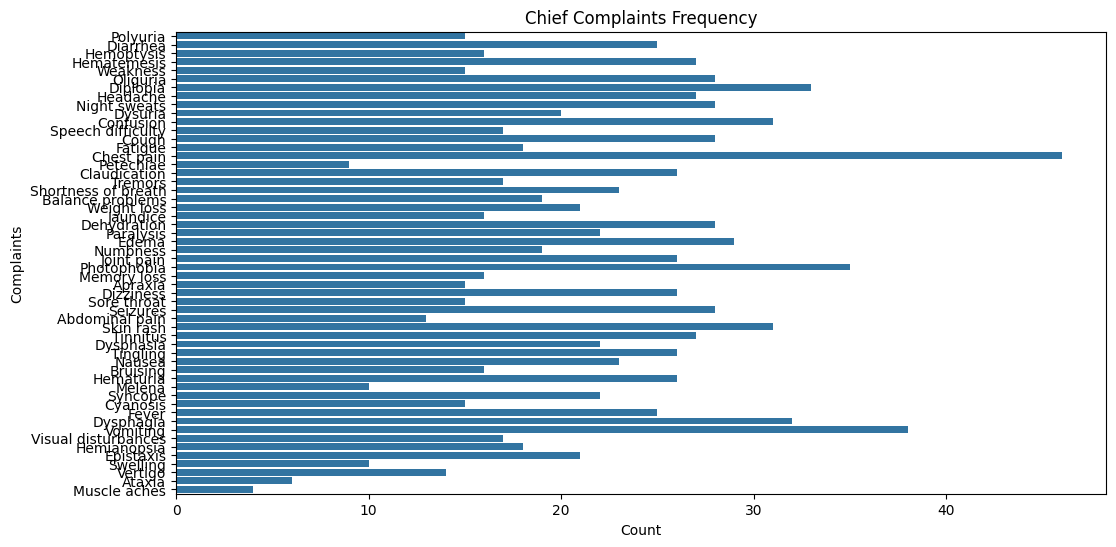

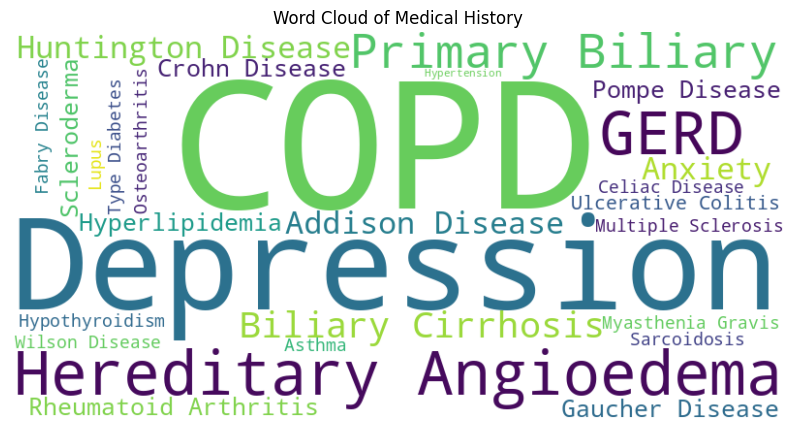

In [4]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.metrics import cohen_kappa_score

# Load the entire dataset from a JSON file
with open("/Users/jamesgoldbach/CS383/GroupProject/medical_rag_dataset_v2.json", "r") as file:
    data = json.load(file)

# Convert case data to DataFrame
cases = pd.json_normalize(data['cases'])
print(f"Dataset shape: {cases.shape}")  # Display the shape of the dataset, should be (1000, columns)

# Step 3: Statistics about dataset attributes
stats = cases.describe(include='all')
print(stats)

# Visualization of Age distribution
cases['patient_age'] = pd.to_numeric(cases['patient_profile.age'], errors='coerce')

plt.figure(figsize=(10, 6))
sns.histplot(cases['patient_age'].dropna(), bins=20, kde=True, color='blue')
plt.title('Distribution of Patient Age')
plt.xlabel('Age')  # Correct usage for xlabel
plt.ylabel('Frequency')  # Correct usage for ylabel
plt.show()

# Visualization of Gender distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='patient_profile.gender', data=cases)
plt.title('Gender Distribution')
plt.xlabel('Gender')  # Correct usage for xlabel
plt.ylabel('Count')  # Correct usage for ylabel
plt.show()

# Visualization of Chief Complaints
chief_complaints = cases['presentation.chief_complaint'].explode()
plt.figure(figsize=(12, 6))
sns.countplot(y=chief_complaints)
plt.title('Chief Complaints Frequency')
plt.ylabel('Complaints')  # Correct usage for ylabel
plt.xlabel('Count')  # Correct usage for xlabel
plt.show()

# WordCloud for Medical History
medical_history = ' '.join(cases['patient_profile.medical_history'].explode().dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(medical_history)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis
plt.title('Word Cloud of Medical History')
plt.show()


